In [2]:
import pandas as pd
import numpy as np
import ast 
import json
import time
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

In [3]:
#makes a data frame of the reviews, minus the books

no_books_reviews_df = pd.read_csv('reviews (no books).csv')

In [4]:
#Generates a list of all book review files names

book_prefix='Book Reviews/reviews_books_'
book_review_files = []

for file_no in range(1,3001):
    book_review_files.append(book_prefix + str(file_no).zfill(4) + '.csv')

In [5]:
#Generates a list of data frames to concatenate

i = 0
book_concat_list=[]


for file in book_review_files:
    df = pd.read_csv(file)
    book_concat_list.append(df)
    i += 1
    
    if i % 100 == 0:
        print(file)
        
        

Book Reviews/reviews_books_0100.csv
Book Reviews/reviews_books_0200.csv
Book Reviews/reviews_books_0300.csv
Book Reviews/reviews_books_0400.csv
Book Reviews/reviews_books_0500.csv
Book Reviews/reviews_books_0600.csv
Book Reviews/reviews_books_0700.csv
Book Reviews/reviews_books_0800.csv
Book Reviews/reviews_books_0900.csv
Book Reviews/reviews_books_1000.csv
Book Reviews/reviews_books_1100.csv
Book Reviews/reviews_books_1200.csv
Book Reviews/reviews_books_1300.csv
Book Reviews/reviews_books_1400.csv
Book Reviews/reviews_books_1500.csv
Book Reviews/reviews_books_1600.csv
Book Reviews/reviews_books_1700.csv
Book Reviews/reviews_books_1800.csv
Book Reviews/reviews_books_1900.csv
Book Reviews/reviews_books_2000.csv
Book Reviews/reviews_books_2100.csv
Book Reviews/reviews_books_2200.csv
Book Reviews/reviews_books_2300.csv
Book Reviews/reviews_books_2400.csv
Book Reviews/reviews_books_2500.csv
Book Reviews/reviews_books_2600.csv
Book Reviews/reviews_books_2700.csv
Book Reviews/reviews_books_2

In [6]:
# Concats a single book reviews dataframe
# Compiled separately due to large, single file dataset

book_reviews_df = pd.concat(book_concat_list)
book_reviews_df['category'] = 'Books'

In [7]:
#concats books and no books review dataframes

concat_list = [no_books_reviews_df, book_reviews_df]

all_reviews = pd.concat(concat_list)

In [8]:
#creates list of all file names containing the meta data

meta_list = []

# apps
#prefix='Metadata/meta_Apps_for_Android_file'
#for file_no in range(1,2):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')

#books
prefix='Metadata/meta_Books_file'
for file_no in range(1,35):
    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')
    
#CDs
prefix='Metadata/meta_CDs_and_Vinyl_file'
for file_no in range(1,6):
    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')

#electronics
#prefix='Metadata/meta_electronics_file'
#for file_no in range(1,7):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')

#Kindle
#prefix='Metadata/meta_Kindle_store_file'
#for file_no in range(1,7):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')
    
#Movies_and_TV
#prefix='Metadata/meta_Movies_and_TV_file'
#for file_no in range(1,5):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')


In [9]:
#concats a list of smaller metadata datafames

meta_concat_list=[]


for file in meta_list:
    df = pd.read_csv(file)
    meta_concat_list.append(df)


In [10]:
#concats a single metadata dataframe, de-dupes

meta_df = pd.concat(meta_concat_list)


meta_df.drop_duplicates(inplace=True)

In [11]:
#merges the reviews df with the metadata df

amazon_data = all_reviews.merge(meta_df, how='left', left_on='asin', right_on='ASIN')
amazon_data = amazon_data.drop('ASIN', axis=1)

In [21]:
amazon_data.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulCount
0,0528881469,Electronics,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09,NaN,NaN,0
1,0528881469,Electronics,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09,NaN,NaN,3
2,0528881469,Electronics,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09,NaN,NaN,2
3,0528881469,Electronics,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09,NaN,NaN,1
4,0528881469,Electronics,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09,NaN,NaN,0


In [22]:
#some of the asin are all numbers, some come through as int, some as str
amazon_data['asin'] = amazon_data['asin'].apply(str)

In [13]:
amazon_data.groupby(['category']).count()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
category,,,,,,,,,,,
Books,3000000,3000000,3000000,2999753,3000000,0,0,0,0,2539170,0
CDs and Vinyl,327759,327759,327759,327748,327759,327759,326635,327740,327759,166810,255726
Electronics,1493863,1493863,1493863,1492902,1493863,1493863,1469941,1493849,1493863,0,0


In [23]:
# Need to fill in the reviewTexts, because current value is a numpy NaN which comes through as float
amazon_data['reviewText'].fillna("", inplace=True)

In [24]:
# Create a textLength category
amazon_data['textLength'] = amazon_data['reviewText'].apply(len)

In [83]:
amazon_data['notHelpfulCount']=amazon_data.apply(lambda row: int(row['helpful']
                                                                 .replace('[','')
                                                                 .replace(']','')
                                                                 .split(',')[1]) - 
                                                              int(row['helpful']
                                                                  .replace('[','')
                                                                  .replace(']','')
                                                                  .split(',')[0]), axis=1)

amazon_data['helpfulCount']=amazon_data.apply(lambda row: int(row['helpful']
                                                              .replace('[','')
                                                              .replace(']','')
                                                              .split(',')[0]), axis=1)






In [ ]:
df['notHelpfulCount'] = df.apply(lambda row: int(row['helpful']
                                                 .replace('[','')
                                                 .replace(']','')
                                                 .split(',')[1]) -
                                             int(row['helpful']
                                                 .replace('[','')
                                                 .replace(']','')
                                                 .split(',')[0]), 
                                                 axis=1)

df['helpfulCount'] = df.apply(lambda row: int(row['helpful']
                                              .replace('[','')
                                              .replace(']','')
                                              .split(',')[0]), 
                                              axis=1)






In [25]:
# Populate unixReviewTime for Books

amazon_data['unixReviewTime'] = amazon_data.apply(lambda row: time.mktime(datetime.datetime.strptime(row['reviewTime'], '%m %d, %Y').timetuple()) if row['category'] == 'Books' else row['unixReviewTime'], axis=1)

#Deprecated version of the above
#for i in range(len(amazon_data)):

#    if amazon_data.at[i,'category'] == 'Books':
#        amazon_data.at[i,'unixReviewTime'] = time.mktime(datetime.datetime.strptime(amazon_data.at[i, 'reviewTime'], '%m %d, %Y').timetuple())

#    if i % 10000 == 0:
#        print(i)

In [46]:
books = amazon_data[amazon_data['category'] == 'Books']

cds = amazon_data[amazon_data['category'] == 'CDs and Vinyl']

electronics = amazon_data[amazon_data['category'] == 'Electronics']

In [28]:
# adding percentile to each dataframe


def add_percentile(df):
    df['percentile'] = df['textLength'].rank(pct=True)
    df['percentile'] = df['percentile'].apply(lambda x: round(x,3)*100) 

add_percentile(books)
add_percentile(cds)
add_percentile(electronics)
add_percentile(amazon_data)


/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('figure', titlesize=40)


def percentile_review_plot(df):
    mean_scores = df.groupby('percentile').mean()['overall']
    percentiles = df.groupby('percentile').mean().index 

    plt.rcParams["figure.figsize"] = [18,9]
    
    if df.iloc[0,1] == 'Books':
        color = 'blue'
    elif df.iloc[0,1] == 'CDs and Vinyl':
        color = 'red'
    elif df.iloc[0,1] == 'Electronics':
        color = 'lightblue'    
    
    plt.scatter(list(percentiles), mean_scores, marker='o', linewidth= 1, 
                edgecolor='black', color = color)    
    
    plt.title(f'{df.iloc[0,1]} Review Score vs. Length\n')
    plt.ylim(3.7,4.7)
    plt.xlabel('Percentile of Review Character Length')
    plt.ylabel('Mean Review Score')
    
    plt.grid(True)
    
  

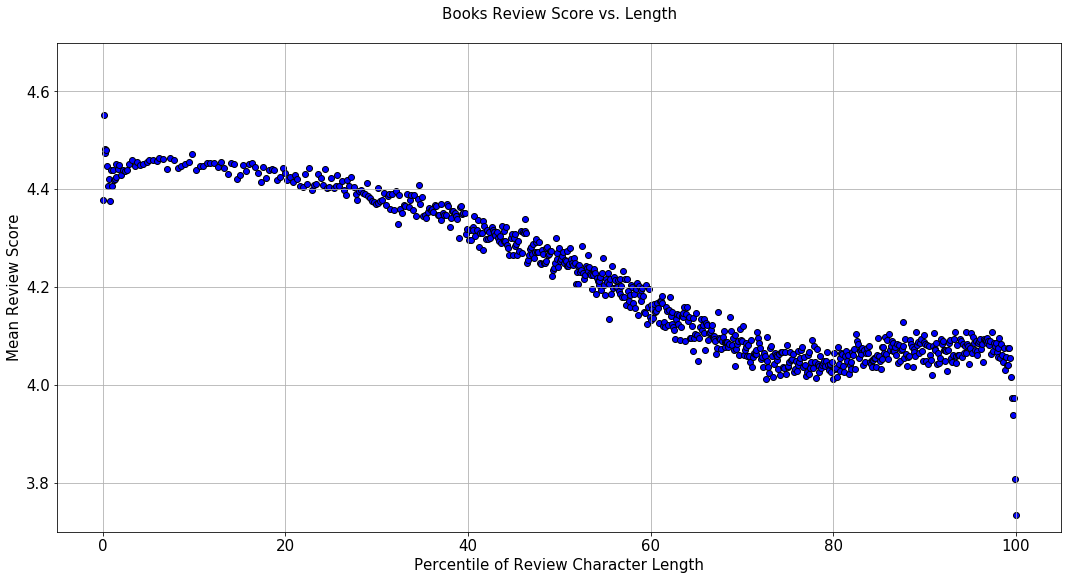

In [88]:
percentile_review_plot(books)

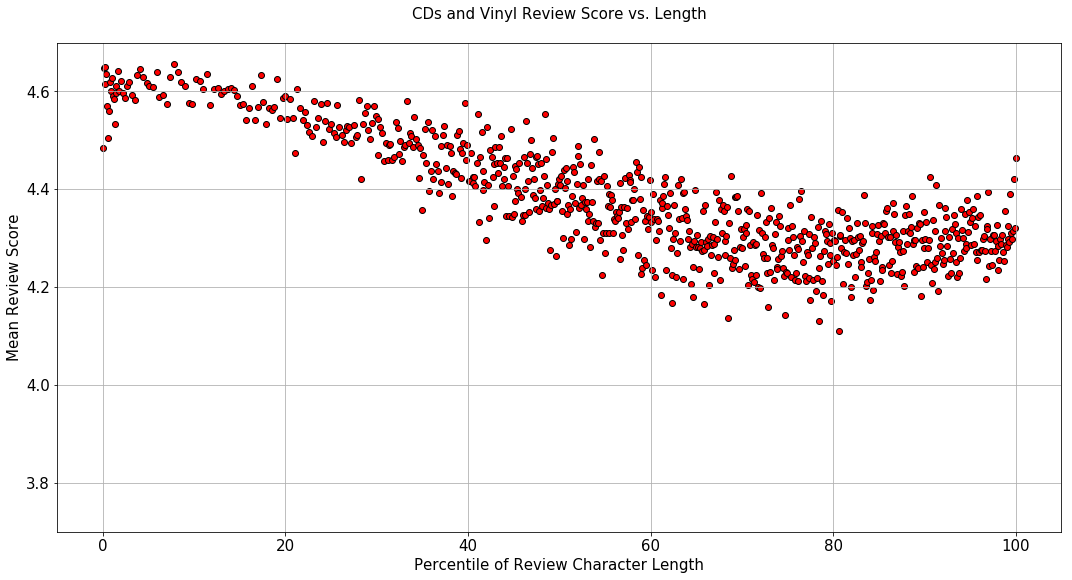

In [89]:
percentile_review_plot(cds)

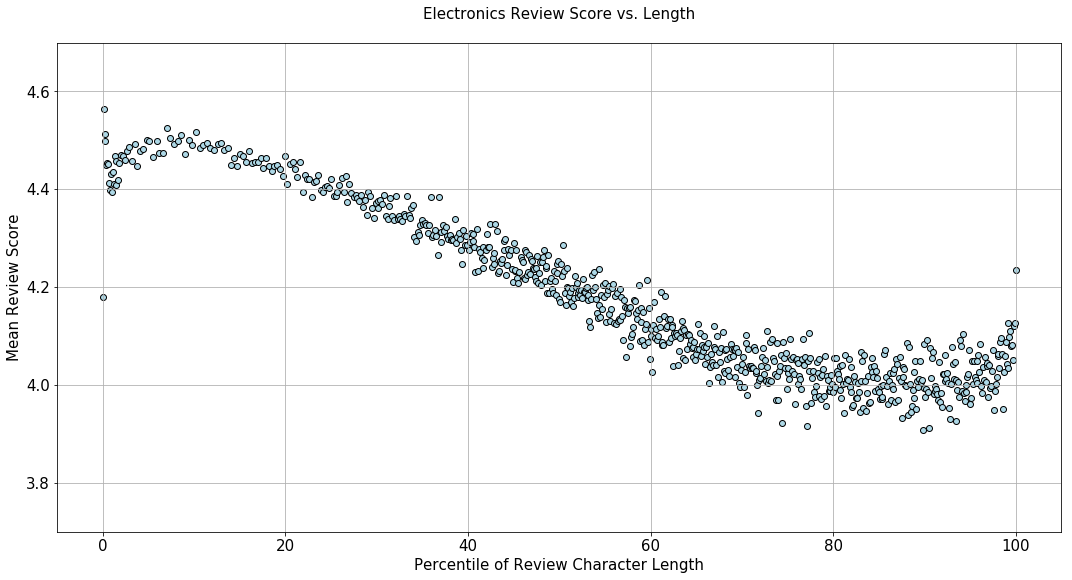

In [90]:
percentile_review_plot(electronics)

In [84]:
def percentile_helpful_plot(df):
    mean_scores = df.groupby('percentile').mean()['helpfulCount']
    percentiles = df.groupby('percentile').mean().index
    
    plt.rcParams["figure.figsize"] = [7,7]
    
    if df.iloc[0,1] == 'Books':
        color = 'blue'
    elif df.iloc[0,1] == 'CDs and Vinyl':
        color = 'red'
    elif df.iloc[0,1] == 'Electronics':
        color = 'lightblue'    
    
    plt.scatter(list(percentiles), mean_scores, marker='o', linewidth= 1, edgecolor='black', color=color)    
    
    plt.title(f'{df.iloc[0,1]} Helpful Votes vs. Length\n')
    plt.xlabel('Percentile of Review Character Length')
    plt.ylabel('Mean Helpful Votes')
    
    plt.grid(True)
    
def percentile_unhelpful_plot(df):
    mean_scores = df.groupby('percentile').mean()['notHelpfulCount']
    percentiles = df.groupby('percentile').mean().index
    
    plt.rcParams["figure.figsize"] = [7,7]
    
    if df.iloc[0,1] == 'Books':
        color = 'blue'
    elif df.iloc[0,1] == 'CDs and Vinyl':
        color = 'red'
    elif df.iloc[0,1] == 'Electronics':
        color = 'lightblue'    
    
    plt.scatter(list(percentiles), mean_scores, marker='o', linewidth= 1, edgecolor='black', color=color)    
    
    plt.title(f'{df.iloc[0,1]} Not Helpful Votes vs. Length\n')
    plt.xlabel('Percentile of Review Character Length')
    plt.ylabel('Mean Not Helpful Votes')
    
    plt.grid(True)

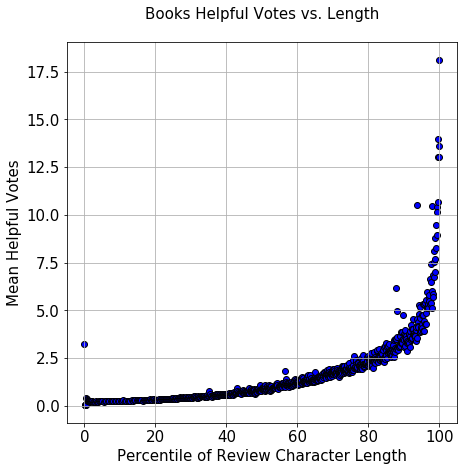

In [77]:
percentile_helpful_plot(books)

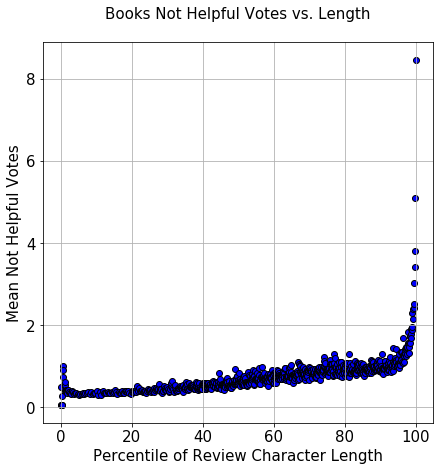

In [78]:
percentile_unhelpful_plot(books)

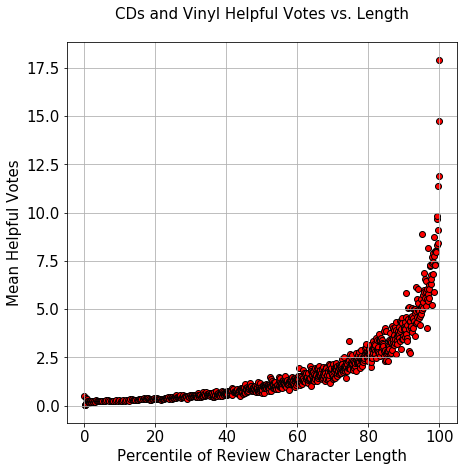

In [79]:
percentile_helpful_plot(cds)

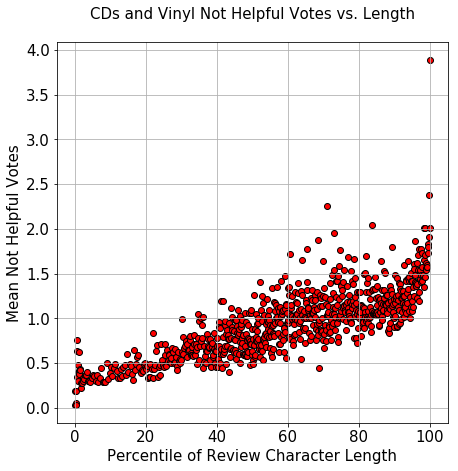

In [80]:
percentile_unhelpful_plot(cds)

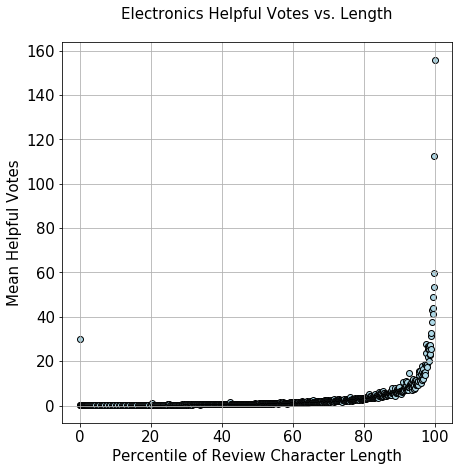

In [81]:
percentile_helpful_plot(electronics)

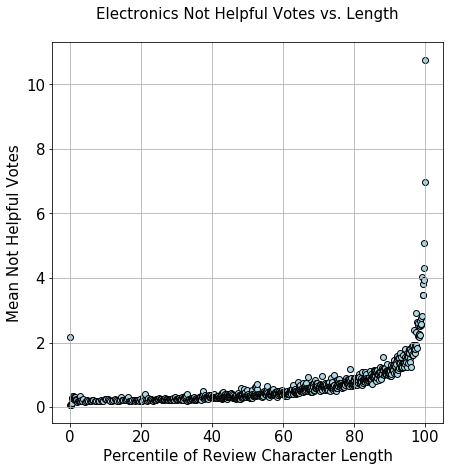

In [82]:
percentile_unhelpful_plot(electronics)

In [77]:
# Function that plots the percentile distribution of a category for visualization

def percentile_length_plot(df): 

    percentiles_index = list(np.arange(0,1001)/10)

    percentiles_value = []

    for i in range(0,1001):
        percentiles_value.append(df['textLength'].quantile(0.001 * i))

    plt.scatter(percentiles_index, percentiles_value)
    plt.grid(True)

    plt.title(f'{df.iloc[0,1]} Review Character Length by Percentile')
    plt.ylabel('Review Character Length')
    plt.xlabel('Percentile')

Text(0.5,0,'Percentile of Review Character Length')

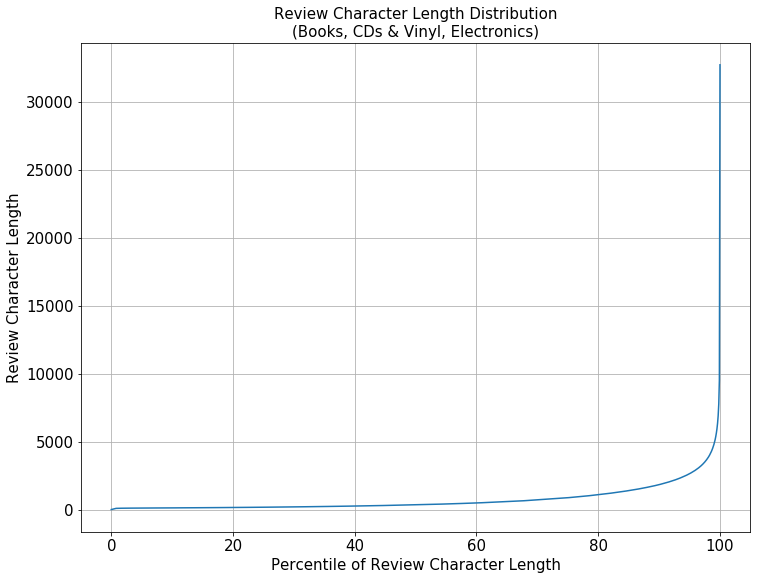

In [105]:
# percentile graph

percentiles_index = list(np.arange(0,1001)/10)

percentiles_value = []

for i in range(0,1001):
    percentiles_value.append(amazon_data['textLength'].quantile(0.001 * i))

plt.plot(percentiles_index, percentiles_value)
plt.grid(True)

plt.title('Review Character Length Distribution\n(Books, CDs & Vinyl, Electronics)')
plt.ylabel('Review Character Length')
plt.xlabel('Percentile of Review Character Length')

In [107]:
amazon_data['textLength'].describe()

count    4.821622e+06
mean     7.376911e+02
std      1.034718e+03
min      0.000000e+00
25%      1.730000e+02
50%      3.510000e+02
75%      8.710000e+02
max      3.271300e+04
Name: textLength, dtype: float64

In [120]:
amazon_data[amazon_data['percentile'] == 1].describe()

,overall,unixReviewTime,Sale Rank,textLength,percentile
count,6282.000000,6.282000e+03,5.440000e+02,6282.000000,6282.0
mean,4.426616,1.365391e+09,8.300233e+04,91.541866,1.0
std,0.979057,3.690382e+07,1.179239e+05,0.498284,0.0
min,1.000000,1.262333e+09,1.110000e+02,91.000000,1.0
25%,4.000000,1.357718e+09,5.997000e+03,91.000000,1.0
50%,5.000000,1.373501e+09,3.494000e+04,92.000000,1.0
75%,5.000000,1.391386e+09,1.145900e+05,92.000000,1.0
max,5.000000,1.406074e+09,1.140222e+06,92.000000,1.0


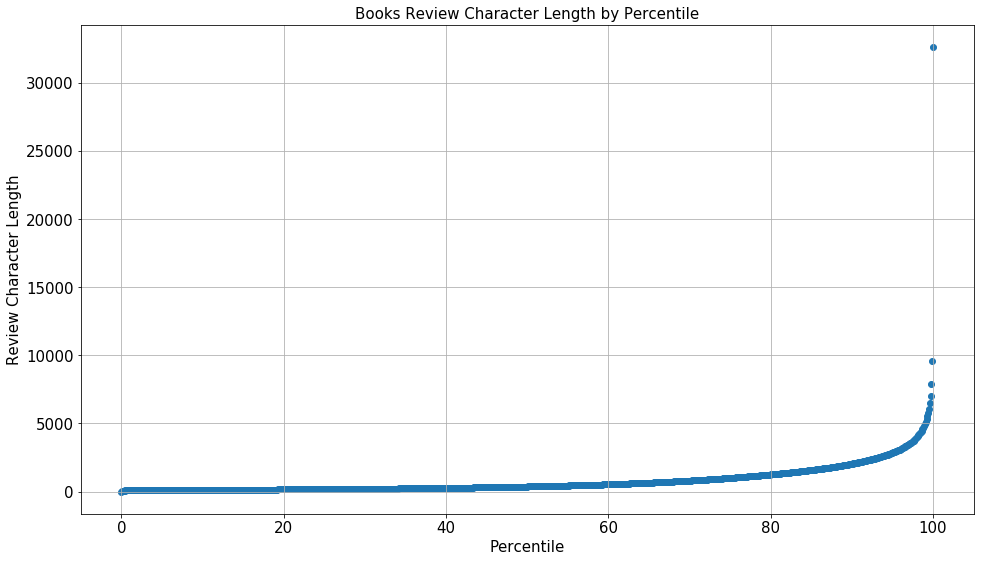

In [83]:
percentile_length_plot(books)

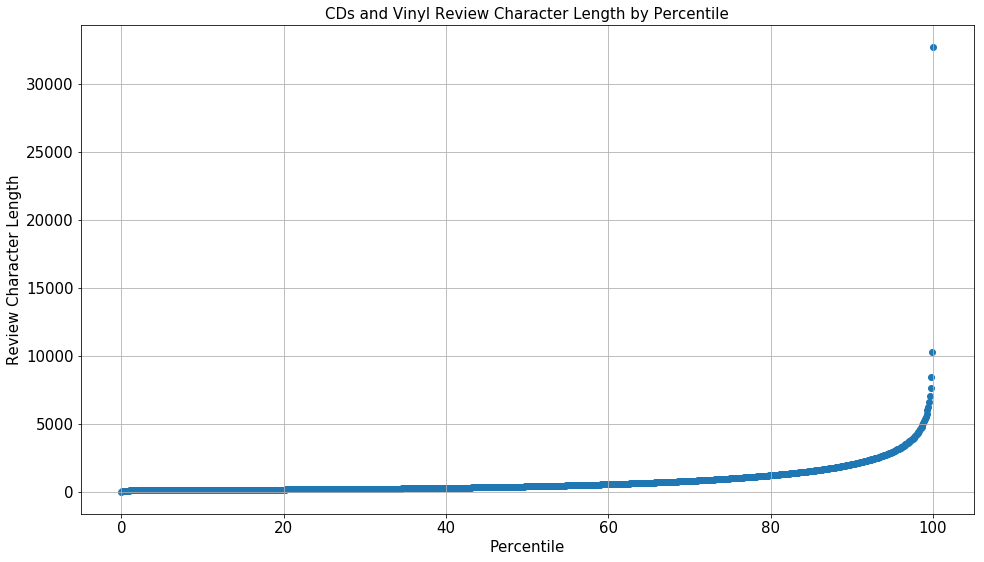

In [79]:
percentile_length_plot(cds)

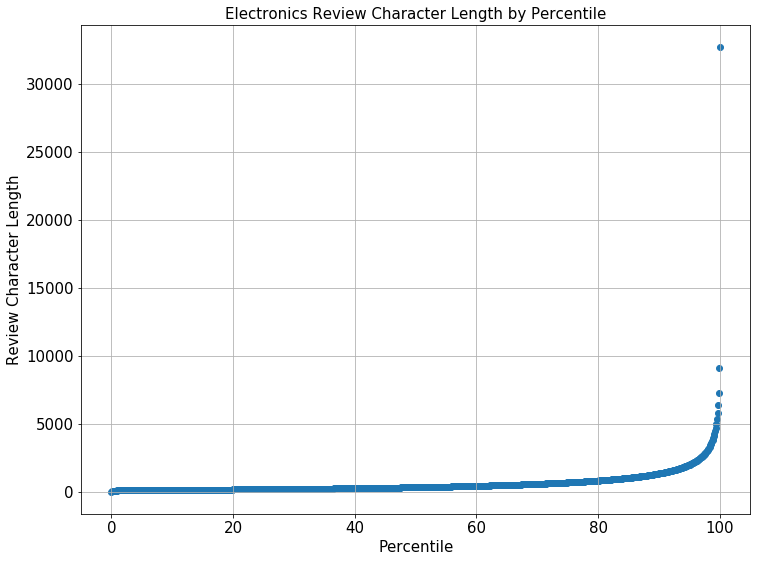

In [135]:
percentile_length_plot(electronics)

In [136]:
incent_books = books[books['reviewText'].str.contains('unbiased review|honest review')]
incent_cds = cds[cds['reviewText'].str.contains('unbiased review|honest review')]
incent_electronics = electronics[electronics['reviewText'].str.contains('unbiased review|honest review')]


In [139]:
def review_distribution(df):
    
    ratings = [1, 2, 3, 4, 5]
    rating_hist = df.groupby('overall').count()['asin']
    
    plt.title(f'{df.iloc[0,1]} Review Distribution')
    plt.bar(ratings, rating_hist)
    
    

In [140]:
review_distribution(incent_books)

NameError: name 'review_distribution' is not defined

In [ ]:
review_distribution(books)

In [ ]:
review_distribution(incent_cds)

In [ ]:
review_distribution(cds)

In [ ]:
review_distribution(incent_electronics)

In [ ]:
review_distribution(electronics)

In [ ]:
# Code to find out the top incent reviews for audit

incent_books_grouped = incent_books.groupby('asin').count()
incent_books_grouped = incent_books_grouped.sort_values('category', ascending=False)

incent_books_grouped.head()

In [175]:
def review_dt_distribution(asin):

    asin_isolated = amazon_data[amazon_data['asin'] == asin]
    first_review_time = min(asin_isolated['unixReviewTime'])
    asin_isolated['first_review_unixReviewTime'] = first_review_time
    asin_isolated['days since first review'] = (asin_isolated['unixReviewTime'] - asin_isolated['first_review_unixReviewTime']) / 60 / 60 / 24
    asin_isolated['days since first review'] = asin_isolated['days since first review'].apply(int)
    days_since_first = asin_isolated.groupby('days since first review').count().index
    days_review_count = asin_isolated.groupby('days since first review').count()['asin']
    
    plt.bar(days_since_first, days_review_count)
    plt.xlabel('Days since earliest review')
    plt.ylabel('Count of Daily Reviews')
    
    plt.title(f'{asin_isolated.iat[0, 10]}')
    

In [179]:
bookthief = amazon_data[amazon_data['asin'] == '375831002']

bookthief = bookthief.sort_values('unixReviewTime', ascending=True)

bookthief.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,textLength,percentile
3130106,375831002,Books,"[1, 2]",4.0,I found this children's book interesting becau...,"01 4, 2010",NaN,NaN,NaN,1.262592e+09,NaN,NaN,532,62.5
3129408,375831002,Books,"[1, 2]",4.0,This book made me want to read more about that...,"01 7, 2010",NaN,NaN,NaN,1.262851e+09,NaN,NaN,303,45.2
3130104,375831002,Books,"[4, 7]",3.0,"After reading all the reviews on this book, I ...","01 9, 2010",NaN,NaN,NaN,1.263024e+09,NaN,NaN,1808,89.8
3129493,375831002,Books,"[1, 1]",5.0,I just finished rereading The Book Thief and I...,"01 11, 2010",NaN,NaN,NaN,1.263197e+09,NaN,NaN,2158,92.5
3129481,375831002,Books,"[1, 1]",5.0,Things that are terrifying or filled with sadn...,"01 15, 2010",NaN,NaN,NaN,1.263542e+09,NaN,NaN,1017,78.5


/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Text(0.5,1,'Bonus Case study: The Book Thief')

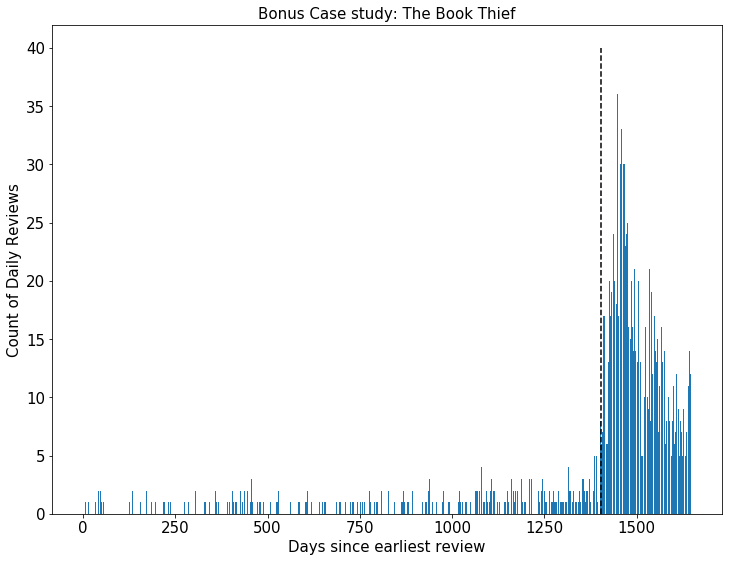

In [189]:
review_dt_distribution('375831002')

plt.vlines(1404, ymin=0, ymax=40, linestyles='dashed', label='Movie Released')

plt.title('Bonus Case study: The Book Thief')

0          0
1          3
2          2
3          1
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         1
14         0
15         0
16         2
17         0
18         0
19         0
20         1
21         0
22         1
23         0
24         0
25         0
26         2
27         0
28         0
29         0
          ..
4821592    4
4821593    3
4821594    1
4821595    1
4821596    1
4821597    0
4821598    0
4821599    0
4821600    0
4821601    0
4821602    0
4821603    0
4821604    0
4821605    0
4821606    0
4821607    0
4821608    0
4821609    0
4821610    0
4821611    0
4821612    0
4821613    0
4821614    0
4821615    0
4821616    0
4821617    0
4821618    1
4821619    0
4821620    0
4821621    3
Name: helpfulCount, Length: 4821622, dtype: int64